In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import statsmodels.api as sm

In [3]:
data = pd.read_csv('/content/Daily_ClimateTrain.csv', parse_dates=['date'], index_col='date')
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


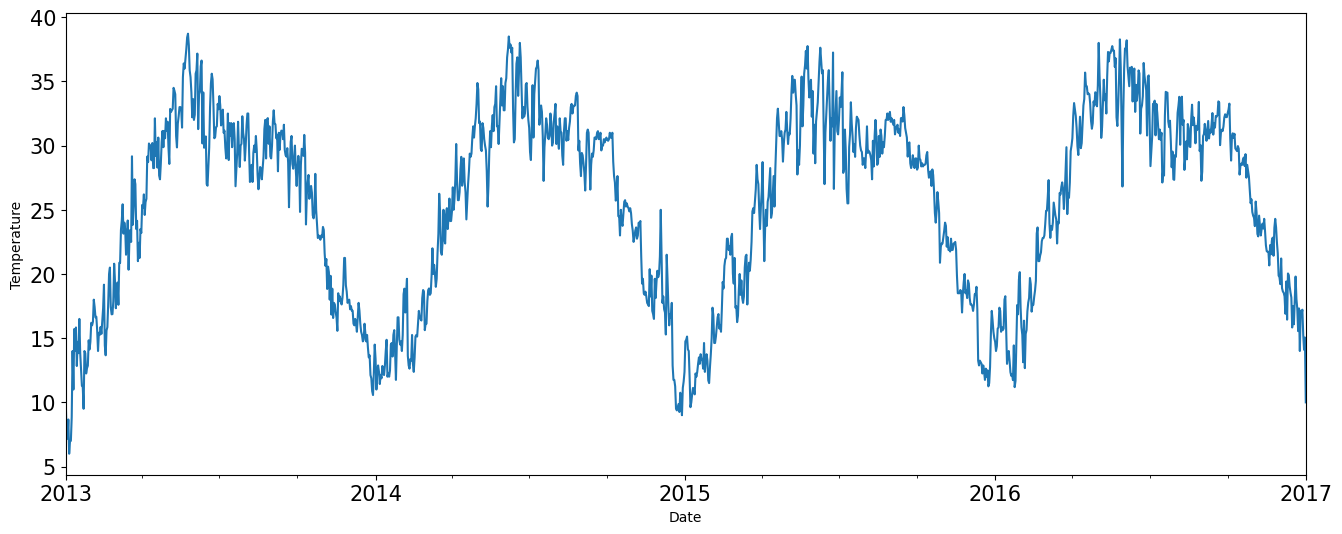

In [4]:
data["meantemp"].plot(figsize=(16, 6), fontsize=15)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

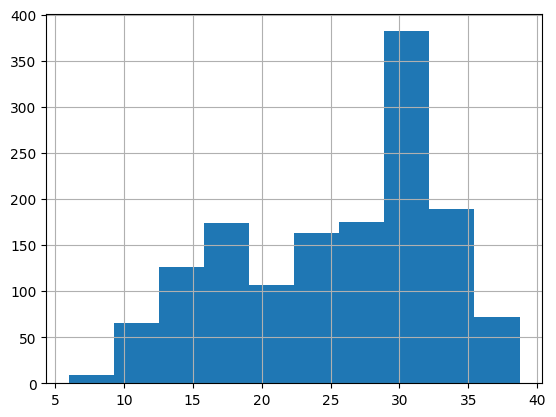

In [5]:
data["meantemp"].hist()
plt.show()

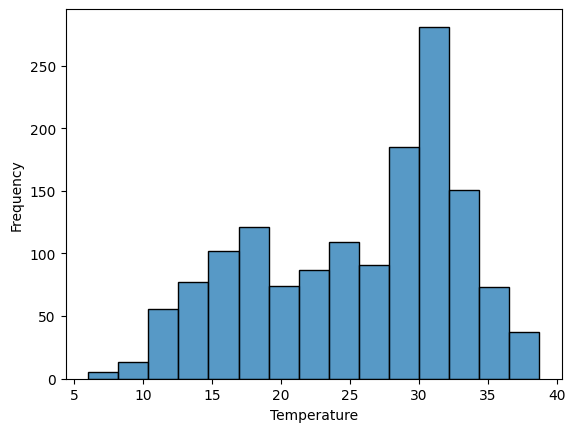

In [35]:
sns.histplot(data.meantemp)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


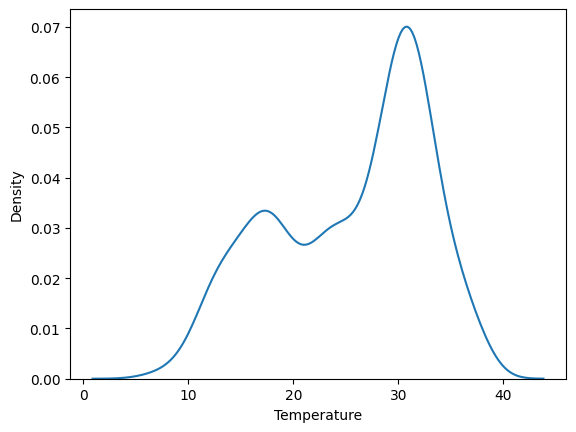

In [36]:
sns.kdeplot(data.meantemp)
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.show()


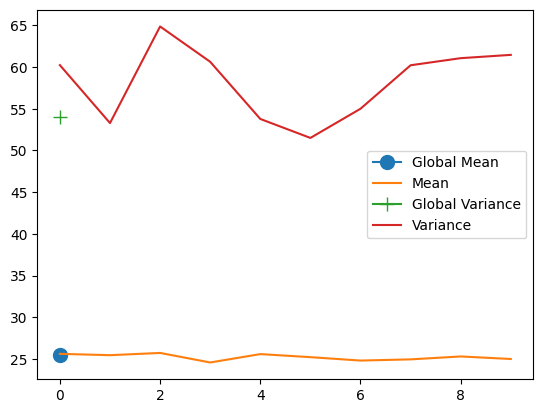

In [6]:
import random
import statistics

meanVal, varianceVal = [], []
for i in range(10):
    sample = random.sample(list(data.meantemp), 100)
    meanVal.append(np.mean(sample))
    varianceVal.append(statistics.variance(sample))

plt.plot(np.mean(data.meantemp), marker="o", markersize=10, label='Global Mean')
plt.plot(meanVal, label='Mean')
plt.plot(statistics.variance(data.meantemp), marker="+", markersize=10, label='Global Variance')
plt.plot(varianceVal, label='Variance')
plt.legend()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

dfTest = adfuller(data.meantemp, autolag='AIC')

print('l. ADF: ' ,dfTest[0])
print('2. P-Value: ', dfTest[1])
print('3. Num Of Lags: ', dfTest[2])
print('4. Num Of Observations used For ADF Regression and Critical values Calculation: ', dfTest[3])
print('5. Critical Values:')
for key, val in dfTest[4].items():
    print('\t', key, ': ', val)

l. ADF:  -2.0210690559206737
2. P-Value:  0.2774121372301601
3. Num Of Lags:  10
4. Num Of Observations used For ADF Regression and Critical values Calculation:  1451
5. Critical Values:
	 1% :  -3.4348647527922824
	 5% :  -2.863533960720434
	 10% :  -2.567831568508802


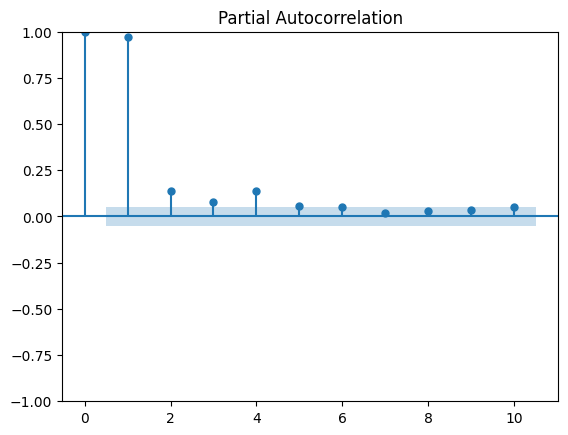

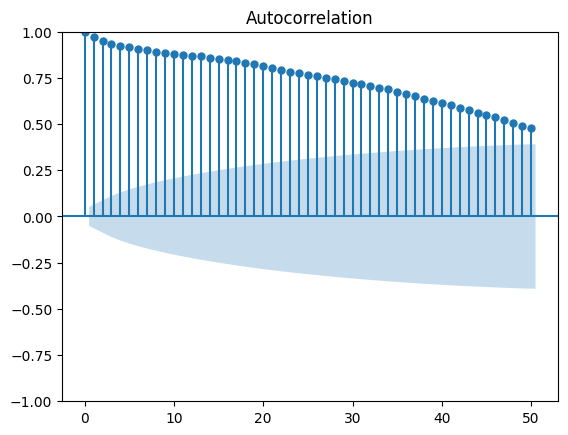

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf = plot_pacf(data.meantemp, lags=10)
acf = plot_acf(data.meantemp, lags=50)

Model Building

In [10]:
train = data.meantemp[:-30]
test = data.meantemp[-30:]
len(train)

1432

AUTO REGRESSION MODEL

In [11]:
from statsmodels.tsa.ar_model import AutoReg
autoRegModel = AutoReg(train, lags=4).fit()
autoRegModel.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1432
Model:                     AutoReg(4)   Log Likelihood               -2704.218
Method:               Conditional MLE   S.D. of innovations              1.608
Date:                Sat, 24 Feb 2024   AIC                           5420.437
Time:                        11:36:28   BIC                           5452.021
Sample:                    01-05-2013   HQIC                          5432.232
                         - 12-02-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5163      0.158      3.270      0.001       0.207       0.826
meantemp.L1     0.8069      0.026     30.849      0.000       0.756       0.858
meantemp.L2     0.0484      0.034      1.433      0.152      -0.018       0.115
meantemp.L3    -0.0263      0.034     -0.781      0.435      -0.092       0.040
meantemp.L4     0.1514      0.026      5.803      0.000       0.100       0.203
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0136           -0.0000j            1.0136           -0.0000
AR.2           -1.9511           -0.0000j            1.9511           -0.5000
AR.3            0.5557           -1.7408j            1.8273           -0.2008
AR.4            0.5557           +1.7408j            1.8273            0.2008
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


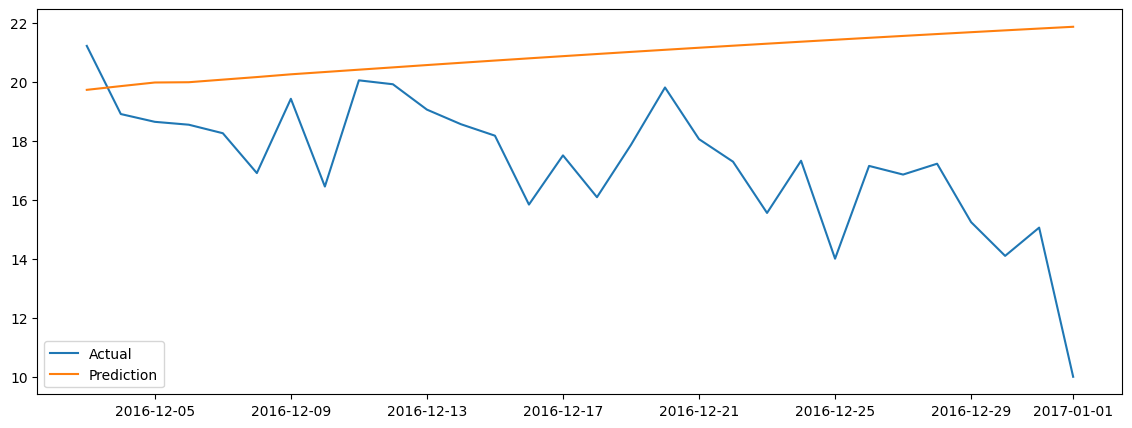

In [12]:
pred0 = autoRegModel.predict(start=len(train), end=len(data.meantemp)-1)
plt.figure(figsize=(14, 5))
plt.plot(test, label='Actual')
plt.plot(pred0, label='Prediction')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(test, pred0, squared=False)
rms

4.457796138027042

Totally opposite to the trend 😅

Let's try experimenting with other features of the data, might provide some value to the regression calculations.

In [15]:
from statsmodels.tsa.ar_model import AutoReg
autoRegModel = AutoReg(train, lags=4, trend='n', seasonal=True, exog=data.drop(columns=['meantemp'])[:-30]).fit()
autoRegModel.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1432
Model:             Seas. AutoReg-X(4)   Log Likelihood               -2616.159
Method:               Conditional MLE   S.D. of innovations              1.512
Date:                Sat, 24 Feb 2024   AIC                           5262.317
Time:                        11:37:29   BIC                           5341.278
Sample:                    01-05-2013   HQIC                          5291.805
                         - 12-02-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
s(1,7)           4.3167      0.398     10.840      0.000       3.536       5.097
s(2,7)           4.4042      0.398     11.060      0.000       3.624       5.185
s(3,7)           4.2396      0.398     10.659      0.000       3.460       5.019
s(4,7)           4.2531      0.399     10.653      0.000       3.471       5.036
s(5,7)           4.2117      0.401     10.492      0.000       3.425       4.998
s(6,7)           4.1733      0.399     10.448      0.000       3.390       4.956
s(7,7)           4.3778      0.402     10.877      0.000       3.589       5.167
meantemp.L1      0.7385      0.025     29.306      0.000       0.689       0.788
meantemp.L2      0.0516      0.032      1.617      0.106      -0.011       0.114
meantemp.L3     -0.0118      0.032     -0.371      0.711      -0.074       0.051
meantemp.L4      0.1599      0.025      6.485      0.000       0.112       0.208
humidity        -0.0390      0.003    -13.394      0.000      -0.045      -0.033
wind_speed      -0.0189      0.010     -1.972      0.049      -0.038      -0.000
meanpressure    -0.0002      0.000     -0.862      0.389      -0.001       0.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0416           -0.0000j            1.0416           -0.0000
AR.2           -1.9128           -0.0000j            1.9128           -0.5000
AR.3            0.4726           -1.7073j            1.7715           -0.2070
AR.4            0.4726           +1.7073j            1.7715            0.2070
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:440: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


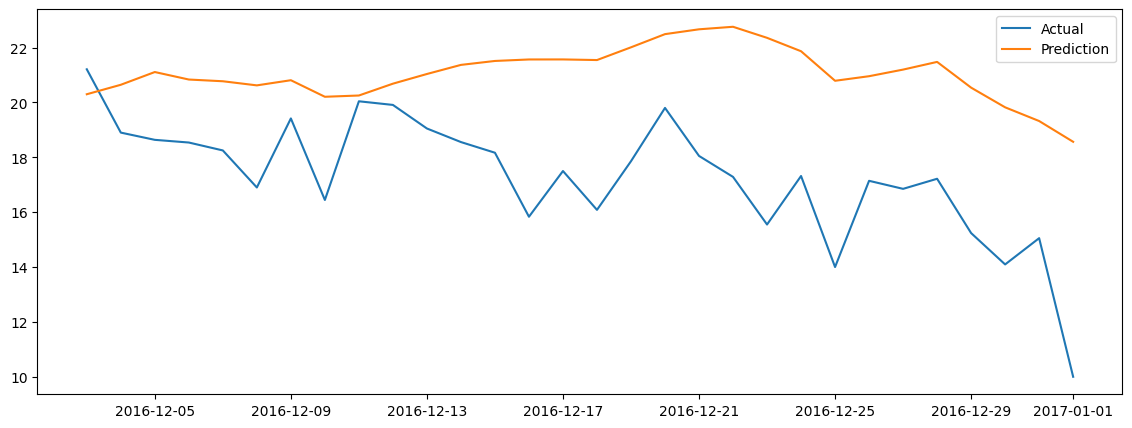

In [16]:
pred1 = autoRegModel.predict( start=len(train), end=len(data.meantemp)-1, exog_oos=data.drop(columns=['meantemp'])[-30:])
plt.figure(figsize=(14, 5))
plt.plot(test, label='Actual')
plt.plot(pred1, label='Prediction')
plt.legend()
plt.show()

In [17]:
rms = mean_squared_error(test, pred1, squared=False)
rms

4.271293281592295

Following the trend with much ups and downs

In [18]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00


ARIMA MODEL

In [19]:
import pmdarima
sarimaModel = pmdarima.arima.auto_arima(train, d=1, m=4, stationary=False, test='adf', trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=5418.245, Time=5.70 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=5521.078, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=5489.951, Time=0.73 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=5476.955, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=5519.099, Time=0.10 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=5423.368, Time=3.94 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=5423.368, Time=2.92 sec
 ARIMA(2,1,2)(2,0,1)[4] intercept   : AIC=5419.041, Time=8.16 sec
 ARIMA(2,1,2)(1,0,2)[4] intercept   : AIC=5418.957, Time=8.98 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=5421.387, Time=3.40 sec
 ARIMA(2,1,2)(0,0,2)[4] intercept   : AIC=5425.366, Time=5.50 sec
 ARIMA(2,1,2)(2,0,0)[4] intercept   : AIC=5425.367, Time=6.06 sec
 ARIMA(2,1,2)(2,0,2)[4] intercept   : AIC=5422.074, Time=9.52 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=5415.480, Time=6.08 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept

In [21]:
sarimaModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1432
Model:             SARIMAX(1, 1, 3)x(1, 0, [1], 4)   Log Likelihood               -2698.464
Date:                             Sat, 24 Feb 2024   AIC                           5410.929
Time:                                     11:41:27   BIC                           5447.792
Sample:                                 01-01-2013   HQIC                          5424.694
                                      - 12-02-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4085      0.125      3.268      0.001       0.163       0.654
ma.L1         -0.6266      0.125     -5.006      0.000      -0.872      -0.381
ma.L2         -0.0428      0.039     -1.106      0.269      -0.119       0.033
ma.L3         -0.0929      0.040     -2.304      0.021      -0.172      -0.014
ar.S.L4        0.9139      0.057     15.903      0.000       0.801       1.026
ma.S.L4       -0.8758      0.069    -12.654      0.000      -1.011      -0.740
sigma2         2.5428      0.072     35.078      0.000       2.401       2.685
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               296.48
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

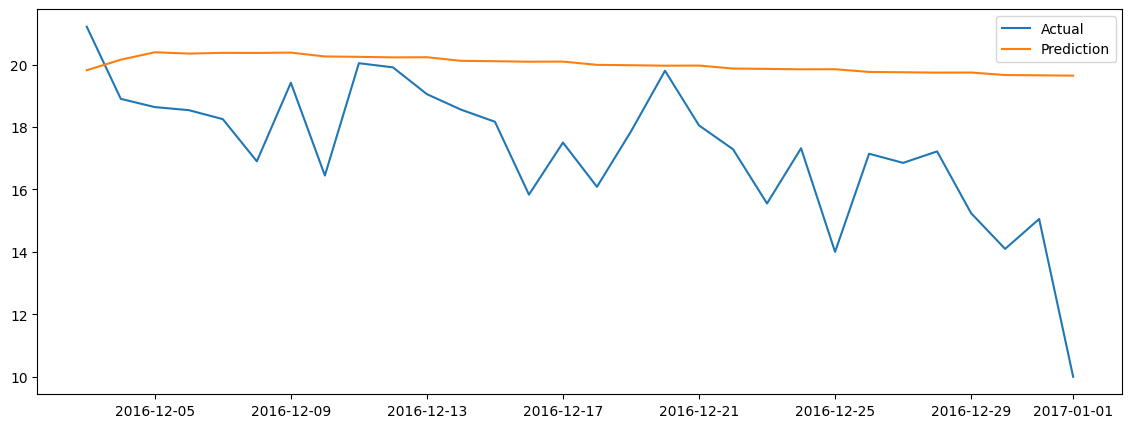

In [22]:
pred2 = sarimaModel.predict(n_periods=30)
plt.figure(figsize=(14, 5))
plt.plot(test, label='Actual')
plt.plot(pred2, label='Prediction')
plt.legend()
plt.show()

In [23]:
mean_squared_error(test, pred2, squared=False)

3.4200014818521596

Line is following the trend straightly and RMSE is also lowered.

In [24]:
trainAllVars = data[:-30]
testAllVars = data[-30:]

In [25]:
sarimaModelOnAllVars = pmdarima.arima.auto_arima(trainAllVars.meantemp,
                                                 X=trainAllVars.drop(columns=['meantemp']),
                                                 d=2, m=4, stationary=False, test='adf', trace=True)

sarimaModelOnAllVars.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=4811.883, Time=8.88 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=5695.930, Time=1.17 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=5407.564, Time=1.77 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=inf, Time=4.39 sec
 ARIMA(2,2,2)(0,0,1)[4]             : AIC=4748.054, Time=8.17 sec
 ARIMA(2,2,2)(0,0,0)[4]             : AIC=4881.316, Time=3.92 sec
 ARIMA(2,2,2)(0,0,2)[4]             : AIC=4826.642, Time=10.72 sec
 ARIMA(2,2,2)(1,0,0)[4]             : AIC=4895.586, Time=5.32 sec
 ARIMA(2,2,2)(1,0,2)[4]             : AIC=4900.830, Time=11.98 sec
 ARIMA(1,2,2)(0,0,1)[4]             : AIC=4726.677, Time=7.85 sec
 ARIMA(1,2,2)(0,0,0)[4]             : AIC=inf, Time=3.87 sec
 ARIMA(1,2,2)(1,0,1)[4]             : AIC=4747.111, Time=8.39 sec
 ARIMA(1,2,2)(0,0,2)[4]             : AIC=4736.156, Time=10.42 sec
 ARIMA(1,2,2)(1,0,0)[4]             : AIC=4759.353, Time=5.32 sec
 ARIMA(1,2,2)(1,0,2)[4]             : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1432
Model:             SARIMAX(0, 2, 3)x(0, 0, [1], 4)   Log Likelihood               -2336.392
Date:                             Sat, 24 Feb 2024   AIC                           4688.783
Time:                                     11:44:35   BIC                           4730.907
Sample:                                 01-01-2013   HQIC                          4704.513
                                      - 12-02-2016                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
humidity        -0.1384      0.003    -41.018      0.000      -0.145      -0.132
wind_speed      -0.0304      0.007     -4.644      0.000      -0.043      -0.018
meanpressure    -0.0001      0.000     -0.252      0.801      -0.001       0.001
ma.L1           -1.0800      0.021    -50.644      0.000      -1.122      -1.038
ma.L2           -0.1366      0.032     -4.217      0.000      -0.200      -0.073
ma.L3            0.2359      0.023     10.199      0.000       0.191       0.281
ma.S.L4         -0.0904      0.025     -3.610      0.000      -0.139      -0.041
sigma2           1.5403      0.039     39.574      0.000       1.464       1.617
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               611.30
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.25
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

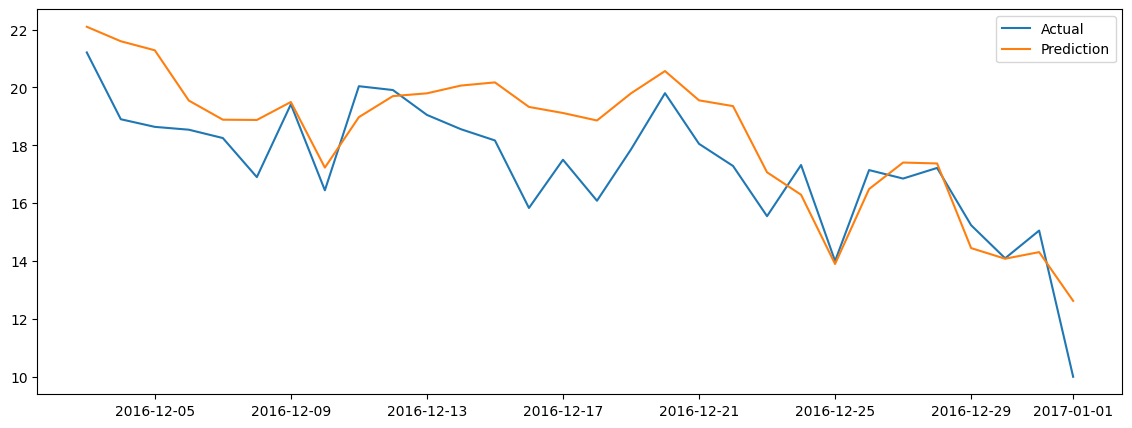

In [26]:
pred3 = sarimaModelOnAllVars.predict(n_periods=30, X=testAllVars.drop(columns=['meantemp']))
plt.figure(figsize=(14, 5))
plt.plot(test, label='Actual')
plt.plot(pred3, label='Prediction')
plt.legend()
plt.show()

In [27]:
mean_squared_error(test, pred3, squared=False)

1.5768740179762983

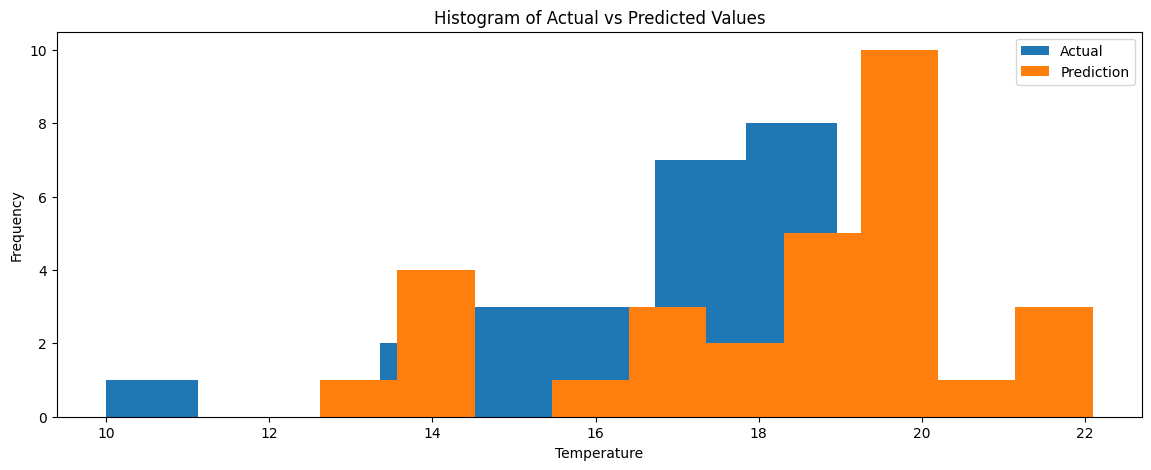

In [40]:
plt.figure(figsize=(14, 5))
plt.hist(test, label='Actual')
plt.hist(pred3, label='Prediction')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Histogram of Actual vs Predicted Values")
plt.legend()
plt.show()

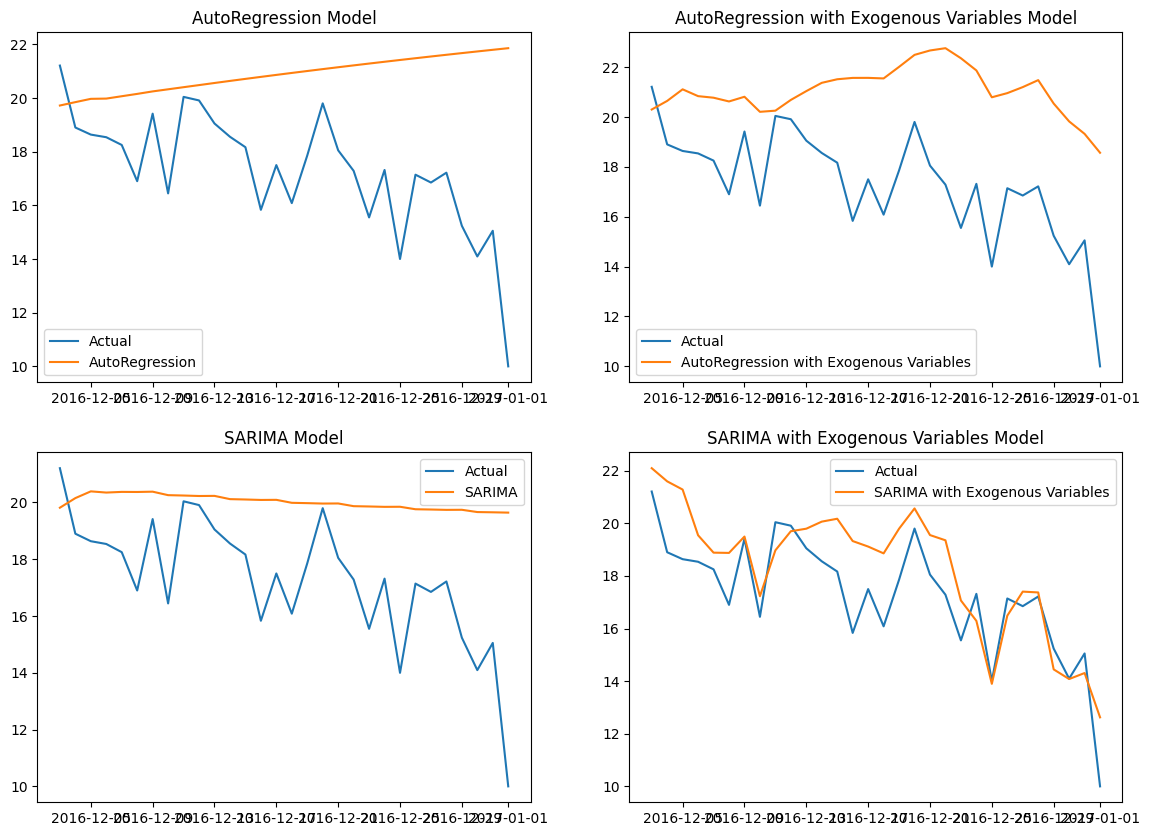

In [42]:


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(test, label='Actual')
axes[0, 0].plot(pred0, label='AutoRegression')
axes[0, 0].set_title('AutoRegression Model')
axes[0, 0].legend()

axes[0, 1].plot(test, label='Actual')
axes[0, 1].plot(pred1, label='AutoRegression with Exogenous Variables')
axes[0, 1].set_title('AutoRegression with Exogenous Variables Model')
axes[0, 1].legend()

axes[1, 0].plot(test, label='Actual')
axes[1, 0].plot(pred2, label='SARIMA')
axes[1, 0].set_title('SARIMA Model')
axes[1, 0].legend()

axes[1, 1].plot(test, label='Actual')
axes[1, 1].plot(pred3, label='SARIMA with Exogenous Variables')
axes[1, 1].set_title('SARIMA with Exogenous Variables Model')
axes[1, 1].legend()

plt.show()


Best Model to Choose

**Models	Root Mean Square Error**

Auto Regressive Model	4.4578

AR Model with supporting features	4.2713

SARIMA Model	3.4200

SARIMA with supporting features	**1.3336**